In [42]:

import time

start_time = time.time()

# כאן נכתוב את הקוד שאנו רוצים למדוד את זמן הרצתו

end_time = time.time()
total_time = end_time - start_time
print("זמן הרצת הקוד הוא: ", total_time, "שניות")

זמן הרצת הקוד הוא:  0.0009586811065673828 שניות


In [ ]:
def image_shrink_1(im, lines, columns):
    shape = im.shape
    lin_fac = shape[0]//lines
    col_fac = shape[1]//columns
    new_mat = np.zeros((shape[0]//lin_fac, shape[1]//col_fac))
    for i in range(new_mat.shape[0]):
        for j in range(new_mat.shape[1]):
            line_range = range(i*lin_fac,min((i+1)*lin_fac,im.shape[1]))
            col_range = range(j*col_fac,min((j+1)*col_fac,im.shape[1]))
            new_mat[i,j] = im[i*lin_fac:min((i+1)*lin_fac,im.shape[1]),j*col_fac:min((j+1)*col_fac,im.shape[1])].mean()
    return new_mat

def image_shrink_2(im, lines, columns):
    shape = im.shape
    lin_fac = shape[0]//lines
    col_fac = shape[1]//columns
    new_mat = np.zeros((shape[0]//lin_fac, shape[1]//col_fac))
    for i in range(new_mat.shape[0]):
        for j in range(new_mat.shape[1]):
            line_range = range(max(0, i*lin_fac),min((i+1)*lin_fac,im.shape[1]))
            col_range = range(max(0, j*col_fac),min((j+1)*col_fac,im.shape[1]))
            new_mat[i,j] = im[i*lin_fac:min((i+1)*lin_fac,im.shape[1]),j*col_fac:min((j+1)*col_fac,im.shape[1])].mean()
    return new_mat

def image_shrink_3(im, lines, columns):
    shape = im.shape
    lin_fac = shape[0]//lines
    col_fac = shape[1]//columns
    new_mat = np.zeros((shape[0]//lin_fac, shape[1]//col_fac))
    for i in range(new_mat.shape[0]):
        for j in range(new_mat.shape[1]):
            line_range = range(max(0, i*lin_fac//2),min((i+1)*lin_fac//2,im.shape[1]))
            col_range = range(max(0, j*col_fac//2),min((j+1)*col_fac//2,im.shape[1]))
            new_mat[i,j] = im[i*lin_fac:min((i+1)*lin_fac,im.shape[1]),j*col_fac:min((j+1)*col_fac,im.shape[1])].mean()
    return new_mat


# im = imageio.imread('files/IMG-20210810-WA0070.jpg')
# mat_1 = image_shrink_1(im, 100, 160)
# mat_11 = im2numbers(mat_1, 7)
# mat_2 = image_shrink_2(im, 100, 160)
# mat_22 = im2numbers(mat_2, 7)
# mat_3 = image_shrink_3(im, 100, 160)
# mat_33 = im2numbers(mat_3, 7)
# plt.figure('aaa')
# plt.imshow(im, cmap=plt.cm.gray)
# plt.show()
# plt.figure()
# plt.imshow(mat_1, cmap=plt.cm.gray)
# plt.show()
# plt.figure()
# plt.imshow(mat_11, cmap=plt.cm.gray)
# plt.show()
# plt.figure()
# plt.imshow(mat_2, cmap=plt.cm.gray)
# plt.show()
# plt.figure()
# plt.imshow(mat_22, cmap=plt.cm.gray)
# plt.show()
# plt.figure()
# plt.imshow(mat_3, cmap=plt.cm.gray)
# plt.show()
# plt.figure()
# plt.imshow(mat_33, cmap=plt.cm.gray)
# plt.show()

In [1]:
# convert image to gray

import math
import numpy as np
import imageio
import matplotlib.pyplot as plt
import pandas as pd
import turtle
import os

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def find_middle(im, col_num):
    shape = im.shape
    lst = []
    for i in range(shape[0]):
        for j in range(shape[1]):
            lst.append(im[i, j])
    lst.sort()
    size = im.size
    mid = size//col_num
    sep = []
    for i in range(col_num-1):
        sep.append(lst[mid*(i+1)])
    return sep

def im2pixel(im, col_num):
    sep = find_middle(im, col_num)
    gap = 255/col_num
    zeros = np.zeros(im.shape)
    for i in range(col_num-2):
        zeros[(im >= sep[i]) & (im < sep[i+1])] = gap*(i+1)
    zeros[im >= sep[-1]] = 255
    return zeros

def im2numbers(im, col_num):
    sep = find_middle(im, col_num)
    zeros = np.zeros(im.shape)
    for i in range(col_num-2):
        zeros[(im >= sep[i]) & (im < sep[i+1])] = col_num-i-2
    zeros[im < sep[0]] = col_num-1
    return zeros

def question(quest, list_of_ans):
    answer = input(quest)
    while answer not in list_of_ans:
        print('The answer must be one of the followers: ', ', '.join(list_of_ans))
        answer = input(quest)
    return answer


# Shrinking image - By linesa
def image_shrink_lines(im, lines, columns):
    shape = im.shape
    lin_fac = shape[0]//lines
    col_fac = shape[1]//columns
    new_mat = np.zeros((shape[0]//lin_fac, shape[1]//col_fac))
    for i in range(new_mat.shape[0]):
        for j in range(new_mat.shape[1]):
            line_range = range(i*lin_fac,min((i+1)*lin_fac,im.shape[0]))
            col_range = range(j*col_fac,min((j+1)*col_fac,im.shape[1]))
            new_mat[i,j] = im[i*lin_fac:min((i+1)*lin_fac,im.shape[0]),j*col_fac:min((j+1)*col_fac,im.shape[1])].mean()
    return new_mat


# Shrinking image - By pixels number
def image_shrink_pixels(im, pixels):
    shape = im.shape
    line = math.floor((pixels//(shape[1]/shape[0]))**0.5)
    col = math.floor((pixels//(shape[0]/shape[1]))**0.5)
    lin_fac = math.ceil(shape[0]/line)
    col_fac = math.ceil(shape[1]/col)
    new_mat = np.zeros((shape[0]//lin_fac, shape[1]//col_fac))
    for i in range(new_mat.shape[0]):
        for j in range(new_mat.shape[1]):
            line_range = range(i*lin_fac,min((i+1)*lin_fac,im.shape[0]))
            col_range = range(j*col_fac,min((j+1)*col_fac,im.shape[1]))
            new_mat[i,j] = im[i*lin_fac:min((i+1)*lin_fac,im.shape[0]),j*col_fac:min((j+1)*col_fac,im.shape[1])].mean()
    return new_mat


# Draw Cubes
def draw_dice(size, dot_size, num_of_dots, height, width):
    turtle.forward(size)
    turtle.left(90)
    turtle.forward(size)
    turtle.left(90)
    turtle.forward(size)
    turtle.left(90)
    turtle.forward(size)
    turtle.penup()

    #     if num_of_dots == 0:
    #         turtle.left(90)
    #         turtle.forward(size*11/10)

    if num_of_dots == 1:
        turtle.goto(width + size / 2, height + size / 2)
        turtle.dot(dot_size)

    if num_of_dots == 2:
        turtle.goto(width + size / 4, height + size / 2)
        turtle.dot(dot_size)
        turtle.goto(width + size * 3 / 4, height + size / 2)
        turtle.dot(dot_size)

    if num_of_dots == 3:
        turtle.goto(width + size / 4, height + size / 4)
        turtle.dot(dot_size)
        turtle.goto(width + size / 2, height + size / 2)
        turtle.dot(dot_size)
        turtle.goto(width + size * 3 / 4, height + size * 3 / 4)
        turtle.dot(dot_size)

    if num_of_dots == 4:
        turtle.goto(width + size / 4, height + size / 4)
        turtle.dot(dot_size)
        turtle.goto(width + size * 3 / 4, height + size / 4)
        turtle.dot(dot_size)
        turtle.goto(width + size * 3 / 4, height + size * 3 / 4)
        turtle.dot(dot_size)
        turtle.goto(width + size / 4, height + size * 3 / 4)
        turtle.dot(dot_size)

    if num_of_dots == 5:
        turtle.goto(width + size / 4, height + size / 4)
        turtle.dot(dot_size)
        turtle.goto(width + size * 3 / 4, height + size / 4)
        turtle.dot(dot_size)
        turtle.goto(width + size * 3 / 4, height + size * 3 / 4)
        turtle.dot(dot_size)
        turtle.goto(width + size / 4, height + size * 3 / 4)
        turtle.dot(dot_size)
        turtle.goto(width + size / 2, height + size / 2)
        turtle.dot(dot_size)

    if num_of_dots == 6:
        turtle.goto(width + size / 6, height + size / 4)
        turtle.dot(dot_size)
        turtle.goto(width + size / 2, height + size / 4)
        turtle.dot(dot_size)
        turtle.goto(width + size * 5 / 6, height + size / 4)
        turtle.dot(dot_size)
        turtle.goto(width + size / 6, height + size * 3 / 4)
        turtle.dot(dot_size)
        turtle.goto(width + size / 2, height + size * 3 / 4)
        turtle.dot(dot_size)
        turtle.goto(width + size * 5 / 6, height + size * 3 / 4)
        turtle.dot(dot_size)

    turtle.left(90)


# show dice paiting
def show_dice_picture(im, size, dot_size, height, width):
    turtle.penup()
    turtle.goto(width,height)
    turtle.pendown()
    new_height = height
    turtle.tracer(2)  # control animation speed
    for i in range(im.shape[0]):
        new_width = width
        for j in range(im.shape[1]):
            draw_dice(size, dot_size, im[i,j], new_height, new_width)
            new_width += size*11/10
            turtle.goto(new_width,new_height)
            turtle.pendown()
        turtle.penup()
        new_height -= size*11/10
        turtle.goto(width,new_height)
        turtle.pendown()

# Final
def show_picture(file):
    colors_num = int(input('How many colors do you want?'))
    original_file = 'files/' + file
    im = imageio.imread(original_file)
    im_gray = rgb2gray(im)
    print('image shape: ' + str(im.shape))
    pixel_or_line_cul = question('Do you want to choose by pixels number or line&columns? (p/lc) ', ['p', 'lc'])

    if pixel_or_line_cul == 'p':
        if im_gray.shape[0] / im_gray.shape[1] < 60 / 115:
            max_pixels = min(im_gray.shape[1], 115)**2*(im_gray.shape[0] / im_gray.shape[1])
        else:
            max_pixels = min(im_gray.shape[0], 60)**2*(im_gray.shape[1] / im_gray.shape[0])
        print(f'max pixels (recommended): {round(max_pixels)}')
        pixels = int(input('How many pixels do you want? '))
        im_shrink = image_shrink_pixels(im, pixels)
        print('New image shape: ' + str(im_shrink.shape))
    else:
        print('max height (recommended): 60, max width (recommended): 115')
        lines = int(input('How many lines do you want? '))
        columns = int(input('How many columns do you want? '))
        im_shrink = image_shrink_lines(im, lines, columns)
    im_pixel = im2pixel(im_shrink, colors_num)
    im_num = im2numbers(im_pixel, colors_num)

    original_image = question('do you want to see the original image? (y/n) ', ['y', 'n'])
    new_image = question('do you want to see the new photo? (y/n) ', ['y', 'n'])

    if original_image == 'y':
        plt.figure()
        plt.imshow(im, cmap=plt.cm.gray)
        plt.show()
    if new_image == 'y':
        plt.figure()
        plt.imshow(im_pixel, cmap=plt.cm.gray)
        plt.show()
        print('Image size: ' + str(im_pixel.shape))

    new_pixel_file = question("do you want to create a new file of the image's pixels? (y/n) ", ['y', 'n'])

    EXPORT_FILES_DIR = 'export_files'

    if new_pixel_file == 'y':
        file_name = input("choose file's name: ") + '.csv'
        path = os.path.join(EXPORT_FILES_DIR, 'csv', file_name)
        df = pd.DataFrame(im_num)
        df.to_csv(path_or_buf=path, index=False)

    see_dice_image = 0
    if colors_num <= 7:
        see_dice_image = question('do you want to see and save the new photo as dice painting? (y/n) ', ['y', 'n'])

    if see_dice_image == 'y':
        file_name = input("choose file's name: ") + '.eps'
        path = os.path.join(EXPORT_FILES_DIR, 'eps', file_name)
        size = 12
        turtle.speed(0)
        turtle.hideturtle()
        height = 386
        width = -765
        #         window = turtle.Screen()
        #         window.setup(width=im_num.shape[1]*size*11/10, height=im_num.shape[0]*size*11/10)
        turtle.penup()
        #         turtle.goto(-im_num.shape[1]*size*11/10//2, im_num.shape[0]*size*11/10//2)

        new_width = max(im_pixel.shape[1] / 115 * width, width)
        new_height = min(im_pixel.shape[0] / 60 * height, height)
        turtle.goto(new_width, new_height)
        turtle.pendown()
        show_dice_picture(im_num, size, size / 3, new_height, new_width)
        turtle.getcanvas().postscript(file=path)
        turtle.done()

def main_function():
    rgb2gray()
    find_middle()
    im2pixel()
    im2numbers()
    question()
    image_shrink_lines()
    image_shrink_pixels()
    draw_dice()
    show_dice_picture()
    show_picture()


How many colors do you want?7
image shape: (810, 1280, 3)
Do you want to choose by pixels number or line&columns? (p/lc) p
max pixels (recommended): 5689
How many pixels do you want? 6500
New image shape: (62, 98)
do you want to see the original image? (y/n) y
do you want to see the new photo? (y/n) y


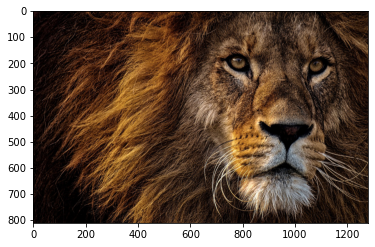

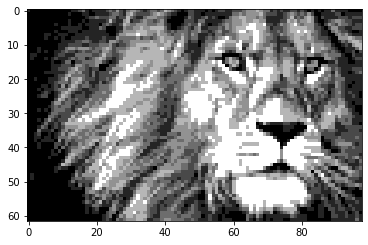

Image size: (62, 98)
do you want to create a new file of the image's pixels? (y/n) n
do you want to see and save the new photo as dice painting? (y/n) y
choose file's name: Lion


In [ ]:
show_picture('lion.jpg')

Pixel Project
------
Introduction
The Pixel Project is a program that allows you to create pixelated images using colors or game cubes for any image of your choice.

Functionality
---------------------------------------
The program offers the following operations:

View the original image.
Display the pixelated image.
Save a CSV file of the pixelated image with numbers.
Draw and save the pixelated image as an ESP file using game cubes.
Usage
To use the program, follow these steps:

Upload the image you want to pixelate to the files folder.

Copy the name of the file and paste it in the appropriate place in the code.

Run the code and answer the following questions:

a. How many shades would you like for the picture? Note that to draw the pixelated image as game cubes, choose a number less than or equal to 7.

b. How would you like to choose the image size? Based on the total number of pixels or by manually defining the number of rows and columns?

c. How many pixels or how many rows and columns would you like?

d. Would you like to see the original image?

e. Would you like to see the pixelated image?

f. Would you like to save the new image as a CSV file?

g. Would you like to see and save the pixelated image as it is drawn by game cubes?

Prerequisites
Before running the code, ensure that you have the following libraries installed:

csharp
Copy code
pip install math
pip install numpy as np
pip install imageio
pip install matplotlib.pyplot
pip install pandas as pd
pip install turtle
pip install os
Additionally, download the EPS Viewer app here to open the EPS files containing the dice pixel images.